### Presentación:

El Banco de Portugal ha encontrado una disminución en sus ingresos. Luego de investigar al respecto se descubrió que el problema radicaba en que los clientes no estaban invirtiendo lo suficiente en plazos fijos a largo plazo, por lo que las autoridades han decidido identificar cuales de los clientes existentes tienen una mayor posibilidad de hacer estos depósitos de forma de enfocar los esfuerzos de marketing en ellos. 

Los datos de los que disponemos provienen de campañas de marketing directo basadas en llamadas telefónicas. En muchos casos se necesitó más de un contacto con el cliente para determinar si este se suscribiría a un depósito a largo plazo o no.

### Objetivos de la investigación:

Se desea determinar qué clientes de este banco son posibles suscriptores a un depósito a largo plazo (tambien conocido como Plazo Fijo). Para realizar estas prediciones analizaremos a que otros servicios financieros se encuentran suscriptos y algunas de sus características personales.

### Equipo de trabajo:

* Victoria Gardella
* Pablo Rabal
* Ornella Padini

### Fuente del Dataset:

Nuestra base de datos fue obtenida de la pagina Kaggle (URL: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification). El dataset se encuentra en formato "csv" y cuenta con dos conjuntos de datos, uno de entrenamiento de aproximadamente 30.000 registros y 16 atributos, y uno de testeo, de aproximadamente 8.000 registros y 15 atributros que no será utilizado en este trabajo. El conjunto de entrenamiento contiene un atributo único denominado "Y", el cual indica si el resultado deseado (la suscripción del cliente a un depósito a largo plazo o plazo fijo) es positivo ("yes") o negativo ("no").

### Criterio de selección:

Dado que nosotros no realizamos la seleccion de los datos ni la conformación de la base de datos no podemos estar seguros de los criterios que fueron usados.
Los criterios que tuvimos en cuenta para seleccionar esta base de datos fueron el tipo de variables incluidas (se incluyen tanto variables categóricas como numéricas) y el número total de registros, lo que nos permitirá realizar un análisis completo y obtener experiencia con el manejo de variables complejas.

### Base de datos:


In [14]:
#Importamos las bibliotecas necesarias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [15]:
#Iniciamos este informe importando la base de datos:

df = pd.read_csv('Clasificación de clientes de banco - Train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [16]:
#Hacemos una copia de respaldo de los datos:

df_respaldo = df.copy(deep=True)

### Data Wrangling:

Dado que los datos que usaremos fueron obtenidos de una página de terceros y no directamente de la entidad bancaria, los primeros pasos del proceso de manipulación de datos o "Data Wrangling" ya fueron llevados a cabo. Realizaremos la busqueda de registros duplicados y manipularemos posteriormente los datos que disponemos para facilitar el análisis:

In [17]:
df_dupl = df[df.duplicated()]
df_dupl

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
24831,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,no
28456,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,no
29543,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,no
30807,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,no
32607,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,no


Nuestro problema es que, aunque parecieran ser datos duplicados, no podemos determinar que lo sean porque no contamos con un ID del cliente o alguna clave identificatoria, por lo que vamos a mantener todos los registros.

Para poder movernos con mayor facilidad en caso de necesitar cambiar las variables categóricas que disponemos haremos un pequeño diccionario indicando las claves de cada atributo. Para eso, cambiaremos los atributos de tipo "objeto" a tipo "categoria":

In [18]:
#Debido a que la librería Pandas nos devuelve un codigo de precaución debemos correr el siguiente código para poder hacer la modificación deseada: 

pd.options.mode.chained_assignment = None

In [19]:
#Cambiamos el tipo de los datos:

cat_col = df.select_dtypes(include=["object"]).columns
cat_col

df[cat_col] = df[cat_col].astype("category")

df.dtypes


age               int64
job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome       category
y              category
dtype: object

Luego de cambiar el tipo de datos de "object" a "category" procedemos a armar el diccionario: 

In [6]:
#Armamos el diccionario:

keys = {} 
df_columns = list(df.select_dtypes("category").columns) 

#Para armar el diccionario vamos a seleccionar las columnas que modificamos anteriormente y vamos a usar el comando enumerate()
#para enumerar las variables categoricas que pueden encontrarse.

for i in df_columns:
    d = dict(enumerate(df[i].cat.categories))
    keys[i] = d

keys

{'job': {0: 'admin.',
  1: 'blue-collar',
  2: 'entrepreneur',
  3: 'housemaid',
  4: 'management',
  5: 'retired',
  6: 'self-employed',
  7: 'services',
  8: 'student',
  9: 'technician',
  10: 'unemployed',
  11: 'unknown'},
 'marital': {0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'},
 'education': {0: 'basic.4y',
  1: 'basic.6y',
  2: 'basic.9y',
  3: 'high.school',
  4: 'illiterate',
  5: 'professional.course',
  6: 'university.degree',
  7: 'unknown'},
 'default': {0: 'no', 1: 'unknown', 2: 'yes'},
 'housing': {0: 'no', 1: 'unknown', 2: 'yes'},
 'loan': {0: 'no', 1: 'unknown', 2: 'yes'},
 'contact': {0: 'cellular', 1: 'telephone'},
 'month': {0: 'apr',
  1: 'aug',
  2: 'dec',
  3: 'jul',
  4: 'jun',
  5: 'mar',
  6: 'may',
  7: 'nov',
  8: 'oct',
  9: 'sep'},
 'day_of_week': {0: 'fri', 1: 'mon', 2: 'thu', 3: 'tue', 4: 'wed'},
 'poutcome': {0: 'failure', 1: 'nonexistent', 2: 'success'},
 'y': {0: 'no', 1: 'yes'}}

### Exploratory Data Analysis:


Debido a que las variables categóricas que tenemos tienen resultados muy extremos entonces es dificil hacer un análisis de correlación. Sin embargo, realizamos un extenso analisis univariado, bivariado y multivariado.

#### Analisis Univariado.

Numero de clientes: 
no     29238
yes     3712
Name: y, dtype: int64
Porcentajes: 
no     88.73
yes    11.27
Name: y, dtype: float64


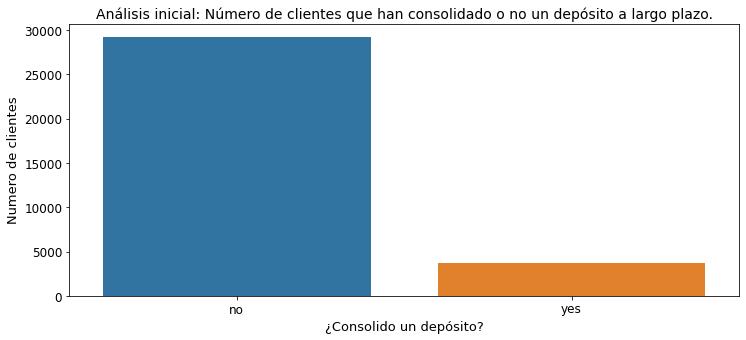

In [7]:
# Analisis Inicial: columna blanco.

x = df['y']

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x=x, data=df)
ax.set_xlabel('¿Consolido un depósito?', fontsize=13)
ax.set_ylabel('Numero de clientes', fontsize=13)
ax.set_title('Análisis inicial: Número de clientes que han consolidado o no un depósito a largo plazo.', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


print(f'Numero de clientes: \n{x.value_counts()}')

print(f'Porcentajes: \n{((x.value_counts()/df.shape[0])*100).round(decimals=2)}')

En nuestro caso el blanco de este análisis es la variable 'Y'. Como dijimos anteriormente, esta nos indica si el cliente ha consolidado un depósito a largo plazo. El 89% de los valores son negativos, versus el 11% correspondiente a los positivos. Debido a lo desequilibrado de estas proporciones tendremos que tomar ciertas precauciones a la hora de entrenar los modelos.

c:\Users\Pacarena\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Porcentaje de los clientes correspondiente a cada trabajo: 
admin.           25.23
blue-collar      22.58
technician       16.39
services          9.70
management        7.12
retired           4.15
entrepreneur      3.52
self-employed     3.34
housemaid         2.59
unemployed        2.42
student           2.16
unknown           0.80
Name: job, dtype: float64


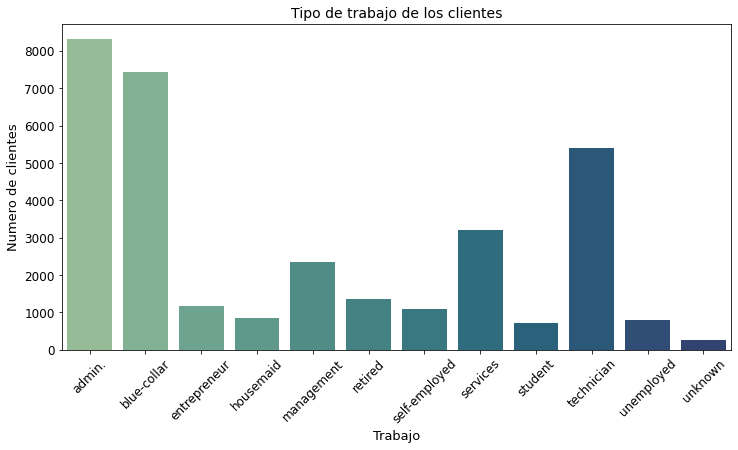

In [8]:
#Figura 1: Tipos de trabajo de los clientes.

x=df["job"]
y=df["job"].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y.index, y, data=df, palette="crest")
ax.set_xlabel('Trabajo', fontsize=13)
ax.set_ylabel('Numero de clientes', fontsize=13)
ax.set_title('Tipo de trabajo de los clientes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)

print(f'Porcentaje de los clientes correspondiente a cada trabajo: \n{((y/df.shape[0])*100).round(decimals=2)}')

Se puede observar que la mayoria de nuestros clientes trabajan en relación de dependencia, dividiendose mayormente entre trabajos administrativos y trabajos técnicos o de cuello azul (obreros, trabajo manual).

Las edades van desde 17 hasta 98


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

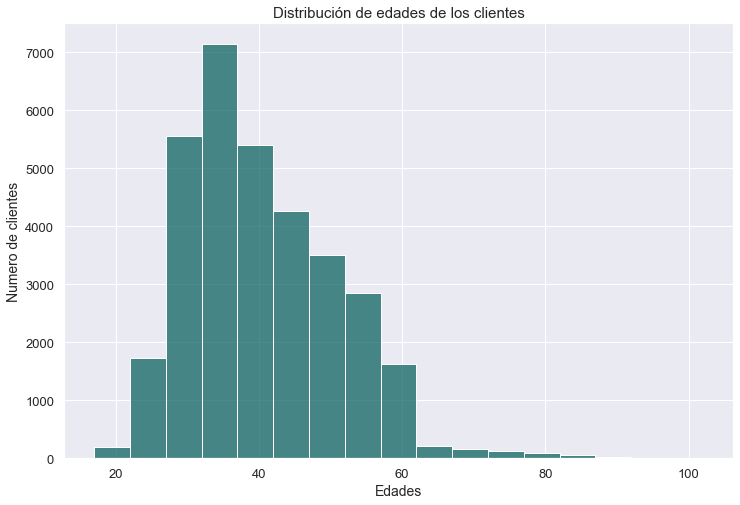

In [53]:
#Figura 2: Edad de los clientes.

#Elegimos usar un histograma para representar las edades de los clientes. Para saber que tamaño de bins usar veamos
#entre que alores se encuentran las edades:

print("Las edades van desde", df["age"].min(), "hasta", df["age"].max())

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df, x=df["age"], binwidth=5, color="#0E6461", edgecolor="white")
ax.set_xlabel('Edades', fontsize=14)
ax.set_ylabel('Numero de clientes', fontsize=14)
ax.set_title('Distribución de edades de los clientes.', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

La mayoria de los clientes son personas jovenes, entre 30 y 50 años. Por otro lado notamos que la cantida de clientes mayores a 60 años es muy poca en comparacion.

Porcentaje de los llamados hechos correspondiente a cada mes: 
may    33.42
jul    17.49
aug    15.02
jun    12.89
nov     9.91
apr     6.33
oct     1.78
sep     1.41
mar     1.32
dec     0.43
Name: month, dtype: float64


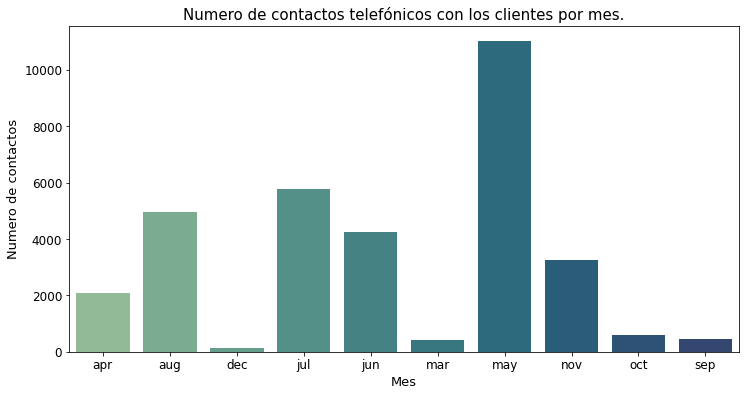

In [9]:
#Figura 3: Mes en el que ocurrió el último contacto.

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x = df['month'], palette="crest")
ax.set_xlabel('Mes', fontsize=13)
ax.set_ylabel('Numero de contactos', fontsize=13)
ax.set_title('Numero de contactos telefónicos con los clientes por mes.', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

porcentaje = df['month'].value_counts()/df.shape[0]*100
print(f'Porcentaje de los llamados hechos correspondiente a cada mes: \n{porcentaje.round(2)}')

En la última campaña de marketing se observa que en los meses de Mayo a Agosto es cuando se realizaron la mayoria de los últimos contactos telefónicos con los clientes.

c:\Users\Pacarena\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


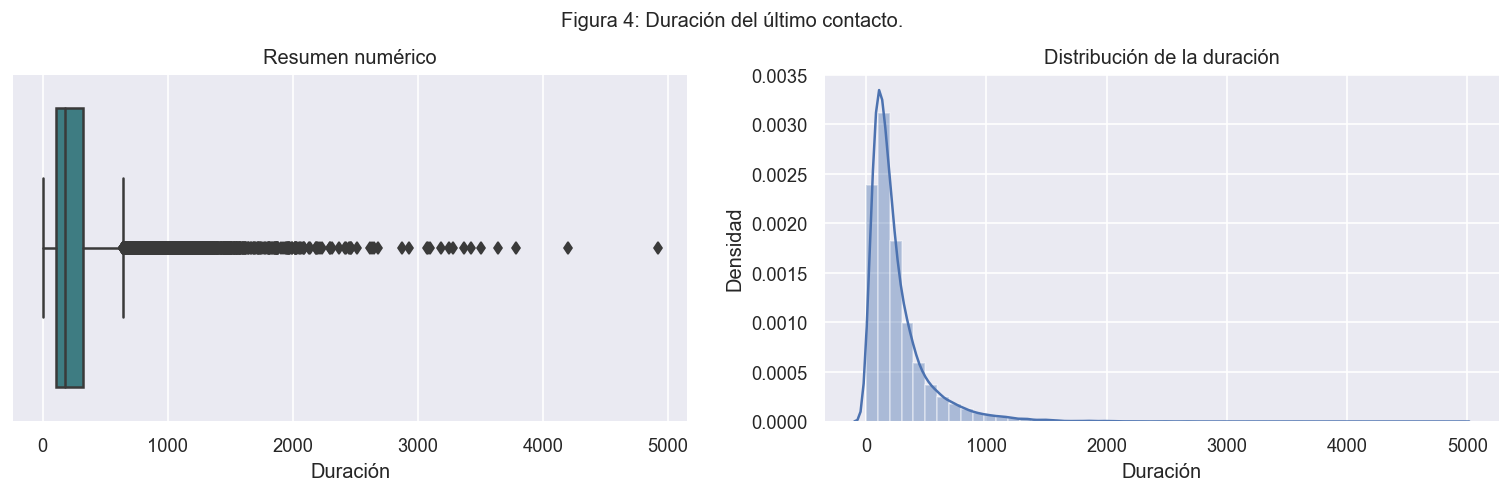

In [138]:
#Figura 4: Duración de las llamadas.

fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize =(16,4))

plot0 = sns.boxplot(x = df['duration'], ax = ax[0], palette="crest")
ax[0].set_xlabel('Duración')
ax[0].set_title('Resumen numérico')

plot1 = sns.distplot(x=df['duration'], ax = ax[1]) #bw_adjust=0.1
ax[1].set_xlabel('Duración')
ax[1].set_ylabel('Densidad')
ax[1].set_title('Distribución de la duración')

plt.suptitle("Figura 4: Duración del último contacto.", fontsize=12)
fig.subplots_adjust(top=0.85)

Si observamos los graficos queda claro que la gran mayoria de las llamadas a los clientes tienen una duración muy corta, pero que existen instancias donde las llamada son largas a muy largas.

c:\Users\Pacarena\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


La distribución del nivel educativo de los cliente es: 
university.degree      29.55
high.school            23.05
basic.9y               14.65
professional.course    12.72
basic.4y               10.08
basic.6y                5.66
unknown                 4.24
illiterate              0.05
Name: education, dtype: float64


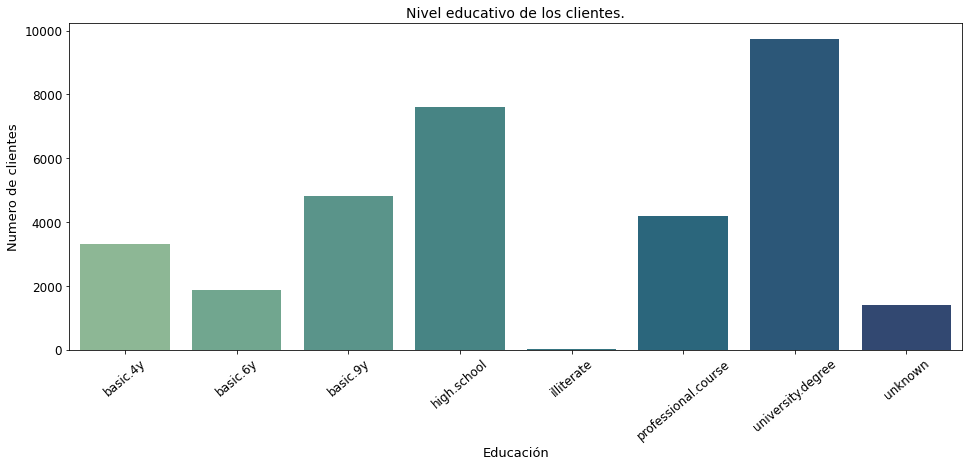

In [11]:
#Figura 5: Educacion de los clientes

x=df["education"]
y=df["education"].value_counts()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(y.index, y, data=df, palette="crest")
ax.set_xlabel('Educación', fontsize=13)
ax.set_ylabel('Numero de clientes', fontsize=13)
ax.set_title('Nivel educativo de los clientes.', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=40)

print(f'La distribución del nivel educativo de los cliente es: \n{((y/df.shape[0])*100).round(2)}')

La mayoria de los clientes presentan educación de nivel universitario, seguido de nivel secundario y profesional.

c:\Users\Pacarena\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Porcentaje de los clientes segun su estado civil: 
married     60.56
single      28.09
divorced    11.15
unknown      0.20
Name: marital, dtype: float64


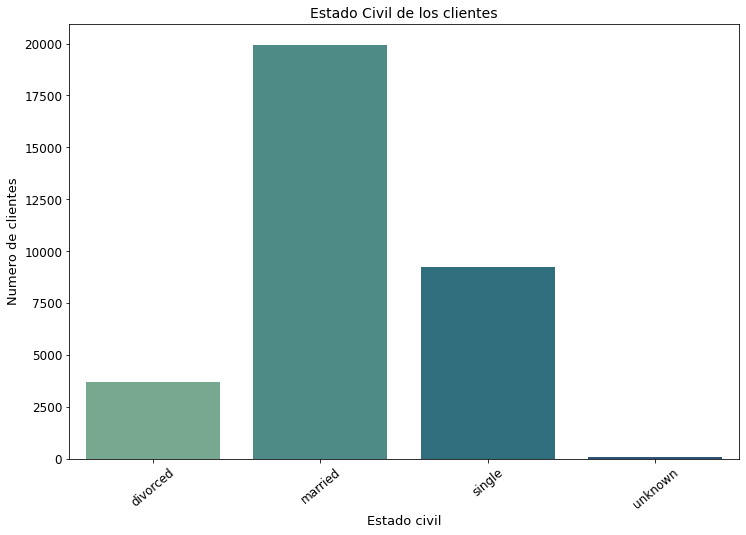

In [13]:
#Figura 6: Estado civil de los clientes.

x=df["marital"]
y=df["marital"].value_counts()

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y.index, y, data=df, palette="crest")
ax.set_xlabel('Estado civil', fontsize=13)
ax.set_ylabel('Numero de clientes', fontsize=13)
ax.set_title('Estado Civil de los clientes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=40)

print(f'Porcentaje de los clientes segun su estado civil: \n{(y/df.shape[0]*100).round(2)}')

Al analizar el estado civil de los clientes podemos ver que la gran mayoria se encuentra casado, seguido por una cantidad mucho menor de solteros.

#### Análisis Bivariado:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

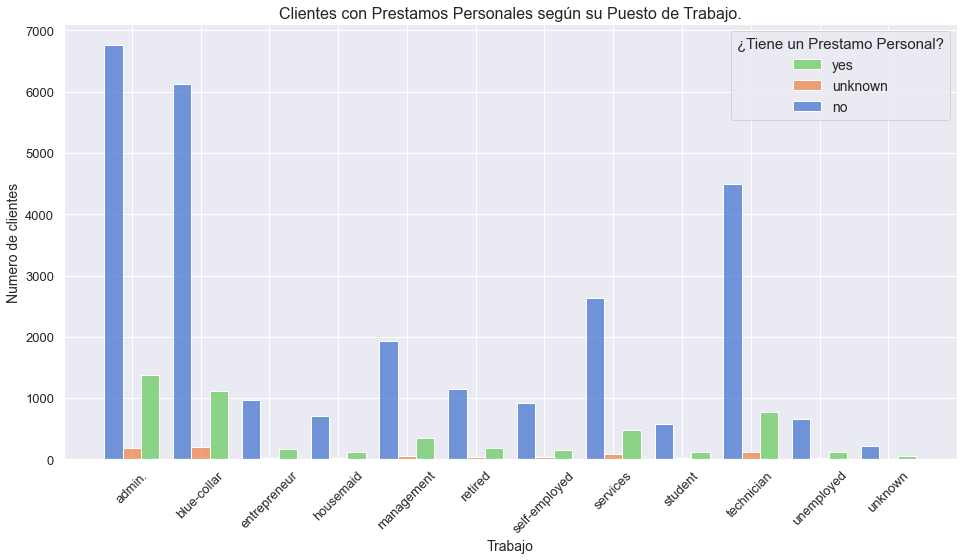

In [5]:
#Figura 7-A: Prestamos personales vs. Puesto de Trabajo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data = df, x = df["job"], hue = df["loan"], multiple = "dodge", shrink=.8, edgecolor = "white", palette="muted", legend=True)
ax.set_xlabel('Trabajo', fontsize=14)
ax.set_ylabel('Numero de clientes', fontsize=14)
ax.set_title('Clientes con Prestamos Personales según su Puesto de Trabajo.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(['yes', 'unknown', 'no'], title='¿Tiene un Prestamo Personal?', title_fontsize=15, fontsize=14)
plt.xticks(rotation=45) 

Se observa que la distribución de clientes que poseen o no prestamos personales (o no se conoce si lo hacen) se mantiene proporcional al número de individuos en cada categoría de trabajo; podemos suponer entonces que no hay una relación entre el tipo de trabajo y la tenencia de prestamos personales.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

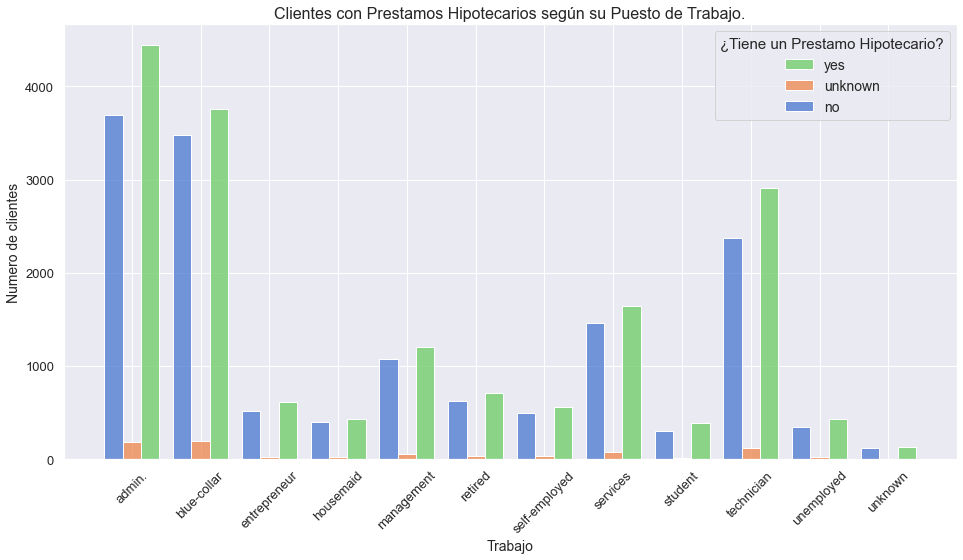

In [8]:
#Figura 7-B: Prestamos hipotecarios vs. Puesto de Trabajo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data = df, x = df["job"], hue = df["housing"], multiple = "dodge", shrink=.8, edgecolor = "white", palette="muted", legend=True)
ax.set_xlabel('Trabajo', fontsize=14)
ax.set_ylabel('Numero de clientes', fontsize=14)
ax.set_title('Clientes con Prestamos Hipotecarios según su Puesto de Trabajo.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(['yes', 'unknown', 'no'], title='¿Tiene un Prestamo Hipotecario?', title_fontsize=15, fontsize=14)
plt.xticks(rotation=45) 

Al hacer un análisis similar con respecto a la tenencia de prestamos hipotecarios con respecto al tipo de trabajo que tiene el cliente se observa nuevamente que la proporcion se mantiene entre las categorias (si, no y desconocido) para cada uno de los trabajos: esto indicaría nuevamente que la distribución solo dependería del número de individuos y que no habría relacion entre estos dos parámetros .

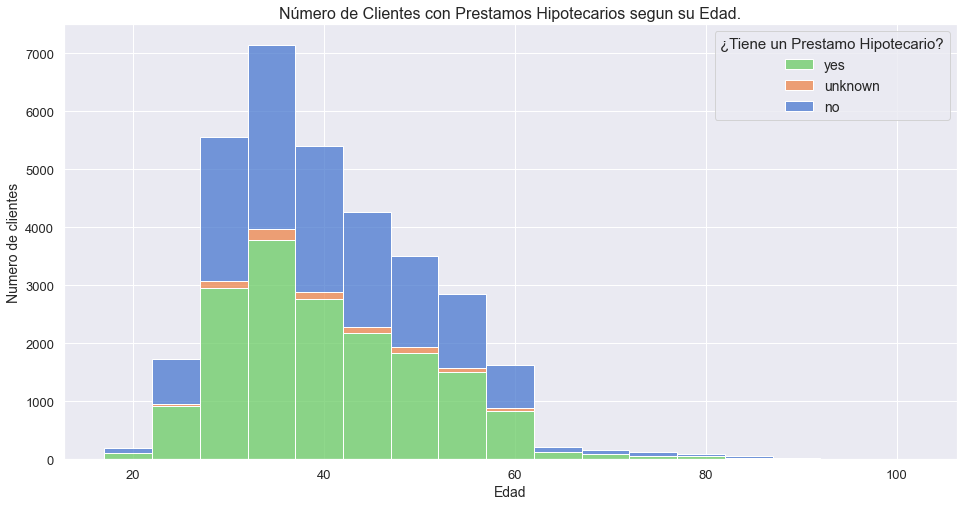

In [48]:
#Figura 8-A: Relación entre Edad y tenenecia de Presatmos Hipotecarios.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data=df, x=df["age"], binwidth=5, hue=df["housing"], multiple="stack", palette="muted")
ax.set_xlabel('Edad', fontsize=14)
ax.set_ylabel('Numero de clientes', fontsize=14)
ax.set_title('Número de Clientes con Prestamos Hipotecarios segun su Edad.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(['yes', 'unknown', 'no'], title='¿Tiene un Prestamo Hipotecario?', title_fontsize=15, fontsize=14)

Cuando graficamos la relación entre edad y tenencia de prestamos hipotecarios observamos que, al igual que en el caso de las figuras 7-A y 7-B, para cada uno de los grupos de edad la proporcion de individuos en cada categoría (si, no y desconocido) se mantiene constante. 

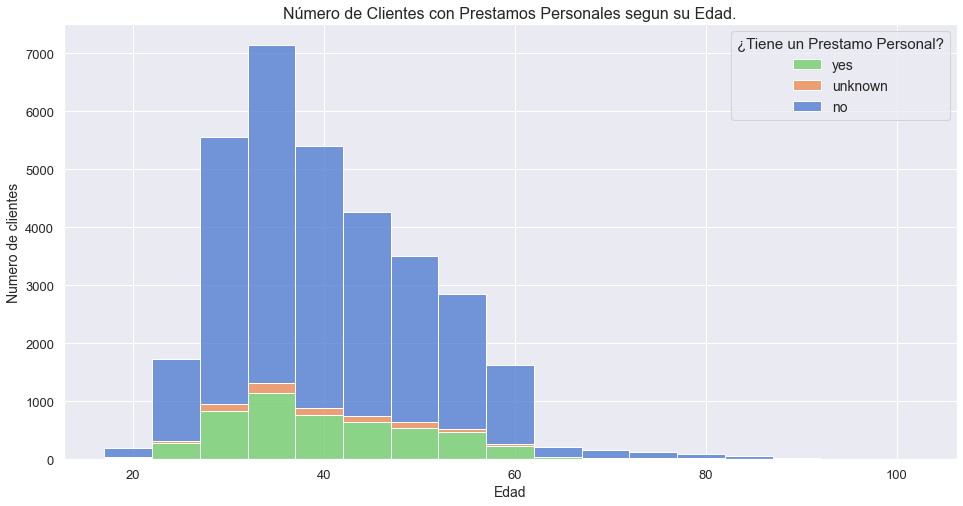

In [11]:
#Figura 8-B: Relación entre Edad y tenencia de Presatmos Personales.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data=df, x=df["age"], binwidth=5, hue=df["loan"], multiple="stack", palette="muted")
ax.set_xlabel('Edad', fontsize=14)
ax.set_ylabel('Numero de clientes', fontsize=14)
ax.set_title('Número de Clientes con Prestamos Personales segun su Edad.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(['yes', 'unknown', 'no'], title='¿Tiene un Prestamo Personal?', title_fontsize=15, fontsize=14)

Al analizar la distribución de personas con prestamos personales con respecto a la edad, nuevamente observamos la misma tendencia que en las figuras 7-A y B y 8-A. Si consideramos todos estos resultados, podemos determinar que no existe una relacion entre la tenencia de préstamos personales o hipotecarios y el tipo de trabajo o la edad del individuo.

#### Análisis Multivariado:

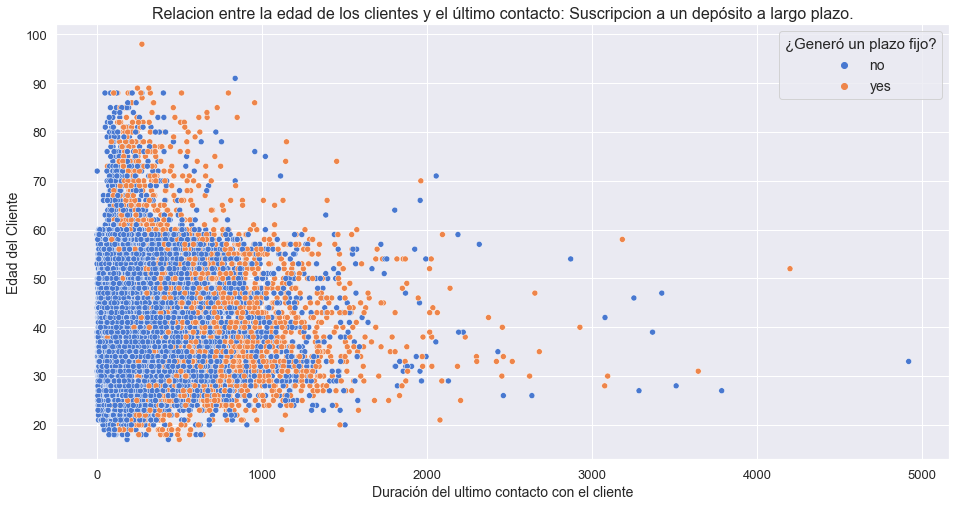

In [5]:
#Figura 9: Edad del cliente, Duración del último contacto con el empleado bancario y Plazo Fijo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df, x=df["duration"], y=df["age"], hue=df["y"], palette="muted")
ax.set_xlabel('Duración del ultimo contacto con el cliente', fontsize=14)
ax.set_ylabel('Edad del Cliente', fontsize=14)
ax.set_title('Relacion entre la edad de los clientes y el último contacto: Suscripcion a un depósito a largo plazo.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(title='¿Generó un plazo fijo?', title_fontsize=15, fontsize=14)

In [52]:
display('Porcentaje de personas mayores a 60 años que crearon un plazo fijo: ', df[['age', 'y']][df['age'] >= 60 ].groupby('y').count(), df[['age', 'y']][df['age'] >= 60 ].groupby('y').count().apply(lambda x: x*100/df[['age', 'y']][df['age'] >= 60 ].shape[0]))

display('Porcentaje de personas menores a 60 años que crearon un plazo fijo: ', df[['age', 'y']][df['age'] < 60 ].groupby('y').count(), df[['age', 'y']][df['age'] < 60 ].groupby('y').count().apply(lambda x: x*100/df[['age', 'y']][df['age'] < 60 ].shape[0]))




'Porcentaje de personas mayores a 60 años que crearon un plazo fijo: '

,age
y,
no,573
yes,376


,age
y,
no,60.379347
yes,39.620653


'Porcentaje de personas menores a 60 años que crearon un plazo fijo: '

,age
y,
no,28665
yes,3336


,age
y,
no,89.575326
yes,10.424674


En este gráfico puede observarse que la duración de las llamadas tiende a ser considerablemente mayor en los clientes de menos 60 años y menor en personas mayores. Si tenemos en cuenta la distribución de colores en todo el espectro de edades se observa que los clientes que suscribieron a un depósito a largo plazo fueron, en general, quienes mantuvieron llamadas de mayor duración. Por otro lado, observemos la proporcion de personas que constituyeron plazos fijos con respecto a su edad: a pesar de que las personas mayores a 60 años representan un grupo sustancialmente menor del total el porcentaje positivo ('yes') es casi cuatro veces mayor que en el caso de las personas menores a 60 años (39,6% vs 10,4%).

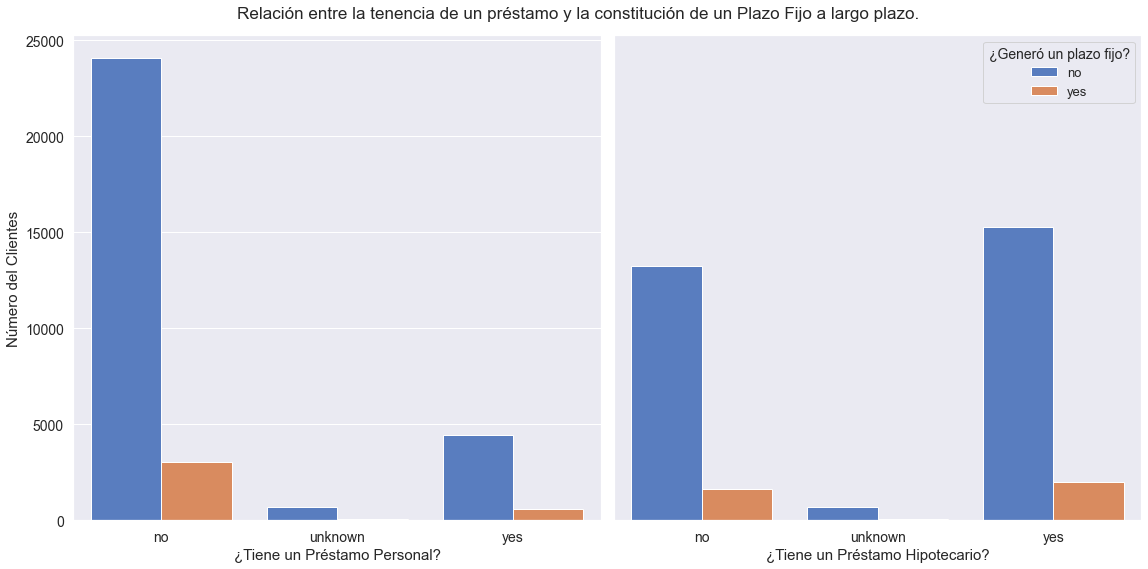

In [92]:
#Figura 10: Duración del último contactos, préstamos personales y éxito de la última campaña.

sns.set()
fig, ax = plt.subplots(ncols = 2, figsize=(16,8), sharey=True)
edad_personal = sns.countplot(data=df, x=df["loan"], hue=df["y"], ax=ax[0], palette="muted")
edad_hipot = sns.countplot(data=df, x=df["housing"], hue=df["y"], ax=ax[1], palette="muted")

ax[0].set_xlabel('¿Tiene un Préstamo Personal?', fontsize=15)
ax[0].set_ylabel('Número del Clientes', fontsize=15)
ax[0].get_legend().remove()

ax[1].set_xlabel('¿Tiene un Préstamo Hipotecario?', fontsize=15)
ax[1].get_yaxis().set_visible(False)


#Facilitamos la visualización:
fig.tight_layout()
plt.suptitle("Relación entre la tenencia de un préstamo y la constitución de un Plazo Fijo a largo plazo.", fontsize=17)
fig.subplots_adjust(top=0.93)
plt.sca(ax[0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.sca(ax[1])
plt.xticks(fontsize=14)
ax[1].legend(title='¿Generó un plazo fijo?', title_fontsize=14, fontsize=13)

In [102]:
display('Número de personas sin Préstamos Personales', df[['loan', 'y']][df['loan'] == 'no' ].groupby('y').count(), df[['loan', 'y']][df['loan'] == 'no' ].groupby('y').count().apply(lambda x: x*100/df[['loan', 'y']][df['loan'] == 'no' ].shape[0]))
display('Número de personas con Préstamos Personales', df[['loan', 'y']][df['loan'] == 'yes' ].groupby('y').count(), df[['loan', 'y']][df['loan'] == 'yes' ].groupby('y').count().apply(lambda x: x*100/df[['loan', 'y']][df['loan'] == 'yes' ].shape[0]))

'Número de personas sin Préstamos Personales'

,loan
y,
no,24073
yes,3058


,loan
y,
no,88.72876
yes,11.27124


'Número de personas con Préstamos Personales'

,loan
y,
no,4459
yes,564


,loan
y,
no,88.77165
yes,11.22835


In [104]:
display('Número de personas sin Préstamos Hipotecarios', df[['housing', 'y']][df['housing'] == 'no' ].groupby('y').count(), df[['housing', 'y']][df['housing'] == 'no' ].groupby('y').count().apply(lambda x: x*100/df[['housing', 'y']][df['housing'] == 'no' ].shape[0]))
display('Número de personas con Préstamos Hipotecarios', df[['housing', 'y']][df['housing'] == 'yes' ].groupby('y').count(), df[['housing', 'y']][df['housing'] == 'yes' ].groupby('y').count().apply(lambda x: x*100/df[['housing', 'y']][df['housing'] == 'yes' ].shape[0]))

'Número de personas sin Préstamos Hipotecarios'

,housing
y,
no,13272
yes,1628


,housing
y,
no,89.073826
yes,10.926174


'Número de personas con Préstamos Hipotecarios'

,housing
y,
no,15260
yes,1994


,housing
y,
no,88.44326
yes,11.55674


En este gráfico nos propusimos ver si la tenencia de algun tipo de prestamo puede relacionarse con la constitución de un depósito a largo plazo. 

Anteriormente habiamos definido que no parecía existir una relación de dependencia entre la tenecia de plazos fijos y la edad o el tipo de trabajo de los clientes del banco. Si nos centramos en los dos graficos y las tablas que los acompañan podremos ver que, aunque varía la cantidad de personas en cada uno de los grupos (si, no y desconocido) que tienen prestamos personales, dentro de estos grupos la proporcion de gente que generó depósitos a largo plazo se mantiene constante. Esta tendencia es mucho más facil de ver directamente en le segundo gráfico. Considerando estos resultados y los obtenidos en la sección de Análisis Bivariado podemos aseverar que la definicion de plazos fijos es independiente a la tenencia de préstamos personales e hipotecarios y a la edad y el tipo de trabajo del cliente.


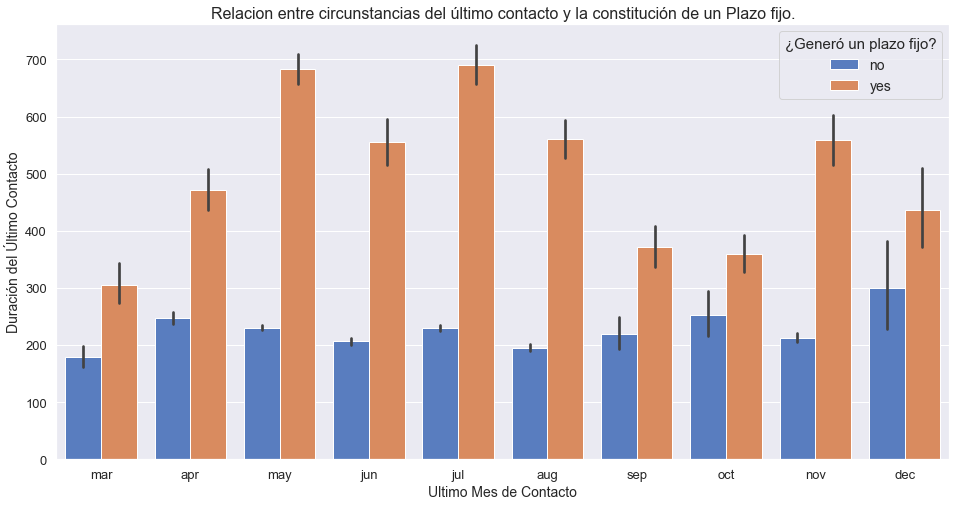

In [6]:
#Figura 11-A: Relacion entre La duración media del último contacto segun el mes y la constitución de un Depósito a largo plazo.
orden=["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=df, x="month", order=orden, y="duration", hue="y", palette="muted")
ax.set_xlabel('Ultimo Mes de Contacto', fontsize=14)
ax.set_ylabel('Duración del Último Contacto', fontsize=14)
ax.set_title('Relacion entre circunstancias del último contacto y la constitución de un Plazo fijo.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(title='¿Generó un plazo fijo?', title_fontsize=15, fontsize=14)

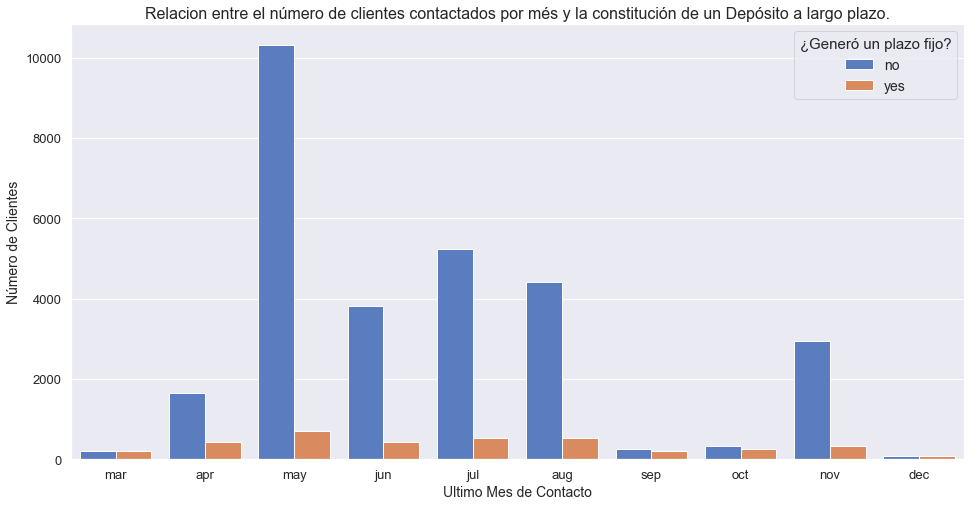

In [13]:
#Figura 11-B: Relacion entre el número de clientes contactados por més y la constitución de un Depósito a largo plazo:
orden=["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(data=df, x="month", order=orden, hue="y", palette="muted")
ax.set_xlabel('Ultimo Mes de Contacto', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)
ax.set_title('Relacion entre el número de clientes contactados por més y la constitución de un Depósito a largo plazo.', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(title='¿Generó un plazo fijo?', title_fontsize=15, fontsize=14)

En este caso analizamos la longitud media del último contacto entre empleado y cliente segun el mes en que se realizó, y si presenta alguna relacion con la suscripcion a un plazo fijo o depósito a largo plazo. 

Si lo analizamos en conjunto con la figura 9 nuevamente se observa que en los casos donde se logró que el cliente hiciera un depósito a largo plazo también se dio que la longitud del último contacto con el cliente fue sustancialmente más larga, sin embargo, en los meses de marzo, septiembre y octubre la duración en los casos "positivos" fue sustancialmente más corta. El mes de diciembre puede ser tenido en consideración también pero con precaución, debido a que su desviación estandar es grande e implica que existe mucha variabilidad en la duración de las llamadas.

Por otro lado, graficamos la cantidad de individuos que fueron contactados por última vez en cada mes y si constituyeron o no plazos fijos, y observamos que de marzo a agosto y tambien en noviembre, momentos donde la duración de las llamadas fue mayor para los casos positivos tambien tuvieron la menor cantidad de casos positivos en relación con el total de casos. Por el otro lado, en marzo, septiembre, octubre y diciembre, donde se observa que la longitud de las llamadas es mucho menor para los casos positivos, aunque la cantidad de individuos contactados es sustancialmente menor de la de los otros meses el porcentaje de casos positivos con respecto al total del mes se acerca a casi la mitad.

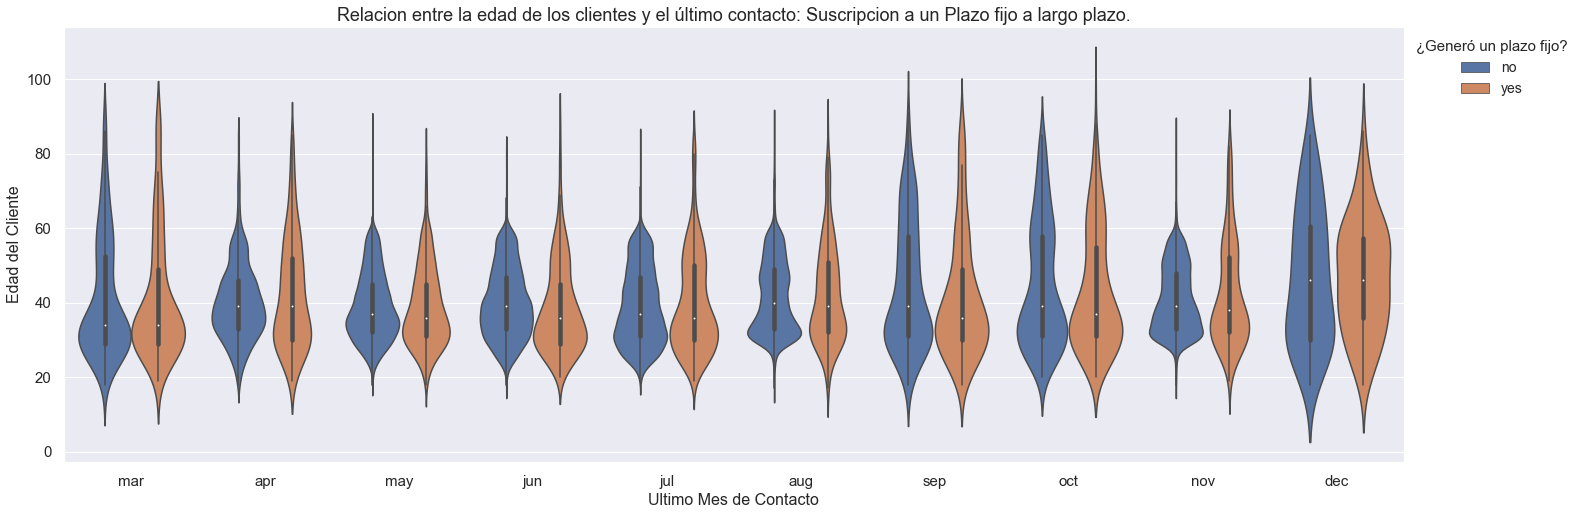

In [180]:
#Figura 12: Relación entre la edad de los clientes, el último mes de contacto y la acreditación de un depósito a largo plazo.

sns.set()
fig, ax = plt.subplots(figsize=(24,8))
trabajo_prestamo_civil = sns.violinplot(data=df, x=df["month"], y=df["age"], hue=df["y"], order=orden)
ax.set_xlabel('Ultimo Mes de Contacto', fontsize=16)
ax.set_ylabel('Edad del Cliente', fontsize=16)
ax.set_title('Relacion entre la edad de los clientes y el último contacto: Suscripcion a un Plazo fijo a largo plazo.', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.legend(title='¿Generó un plazo fijo?', title_fontsize=15, fontsize=14, loc=2, bbox_to_anchor=(1,1))

Este gráfico complementa la figura 9. En este caso se muestra la distribución de las edades de los clientes que hicieron o no un depósito a largo plazo segun el último mes de contacto.

En la figura 9 habiamos visto que, entre los clientes mayores a 60 años se observaba una mayor proporción de resultados positivos que para menores de 60 años, aun cuando la duración del último contacto fuera sustancialmente menor. En la figura 11-A pudimos observar que en los meses de marzo, septiembre, octubre y diciembre la longitud de las llamadas que corresponden al último contacto disminuyen, por lo que podria haber una relación entre ambos resultados. 

Para analizar esta hipotesis hicimos la figura 12: este nos indica la distribución de las edades de los clientes segun el último mes de contacto. Lo que podemos ver es que en los meses de marzo, septiembre, octubre y diciembre el grafico de violin indica que hubo una mayor cantidad de clientes de más de 60 años a comparación del resto de los meses (visualizable como un ensanchamiento del violin en la zona superior). A pesar de que es dificil saber el por qué de este comportamiento, puede ser usado como una posible estrategia de marketing si el comportamiento se mantiene.

Adjuntamos una pequeña tabla que nos permite visualizar la cantidad de clientes que hicieron un depósito a largo plazo segun el mes del último contacto: como podemos ver, aunque la cantidad global de los clientes que dieron resultados positivos es menor, la cantidad de clientes que dieron resultados en esos meses es sustancialmente mas chica que en otros meses, por lo que el porcentaje del total se acerca al 50%.

In [20]:
#Adjunto una pequeña tabla que nos permite ver la relación entre el número de clientes que hicieron un depósito a largo plazo y los que no según el mes.

cant_mes = df[["month","y"]].groupby("month").count()

yes = df[df["y"] == "yes"][["month","y"]].groupby("month").count()
no = df[df["y"] == "no"][["month","y"]].groupby("month").count()


yes.rename(columns = {'y':'yes'}, inplace = True)
no.rename(columns = {'y':'no'}, inplace = True)


dt = pd.concat([yes, no], axis=1)
dt

,yes,no
month,,
apr,427,1658
aug,531,4417
dec,72,71
jul,532,5231
jun,441,3806
mar,217,219
may,699,10312
nov,332,2934
oct,254,333


## Segunda/Tercera Entrega:

#### Análisis General:

Realizamos una copia del dataset para poder armar un primer análisis de las variables categóricas. En este caso debemos tener en cuenta que se usó un método automatizado para codificar variables las categóricas a numéricas debido a que cada variable categórica tenía un gran número de posibles valores y al analizar la relación de cada valor en cada categoría con los valores de la variable 'y' las tendencias no resultaban claras ni facilmente aproximables mediante números enteros (analisis realizado mediante la biblioteca SweetViz, se adjunta el archivo en caso de que se desee analizar), por lo que los números usados pueden no ser los óptimos.

In [131]:
#Pasamos las variables categóricas a números:

df2 = df.copy(deep=True)

cols = df2.select_dtypes(include=["category"]).columns

df2[cols] = df2[cols].apply(lambda x: x.cat.codes)
df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


Para poder determinar de forma clara que clientes tienene mayor probabilidad de constituir un plazo fijo vamos a entrenar un conjunto de algoritmos de Machine Learning, los cuales luego evaluaremos para quedarnos con el mejor.

In [132]:
#Libraries necesarias

from pycaret.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import KFold
from mlflow.sklearn import save_model, load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import pickle

In [133]:
#Iniciamos el entorno de aprendizaje:

modelos_clasif = setup(data = df2, target = "y", normalize=True)

,Description,Value
0,session_id,5724
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32950, 16)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [114]:
#Comparamos los diferentes modelos:

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9039,0.8794,0.3497,0.6569,0.4556,0.4083,0.4332,0.3790
lr,Logistic Regression,0.9023,0.8748,0.3310,0.6511,0.4380,0.3908,0.4181,0.8320
catboost,CatBoost Classifier,0.9023,0.8762,0.3490,0.6400,0.4511,0.4026,0.4252,4.3140
lightgbm,Light Gradient Boosting Machine,0.9022,0.8744,0.3610,0.6332,0.4591,0.4098,0.4298,0.0830
ada,Ada Boost Classifier,0.9021,0.8757,0.3358,0.6454,0.4415,0.3937,0.4192,0.1640
xgboost,Extreme Gradient Boosting,0.9017,0.8735,0.3441,0.6377,0.4464,0.3977,0.4209,0.4920
lda,Linear Discriminant Analysis,0.9005,0.8745,0.3922,0.6063,0.4758,0.4237,0.4363,0.0270
ridge,Ridge Classifier,0.8991,0.0000,0.2824,0.6413,0.3917,0.3458,0.3808,0.0160
svm,SVM - Linear Kernel,0.8962,0.0000,0.2313,0.6331,0.3311,0.2898,0.3353,0.0350
knn,K Neighbors Classifier,0.8958,0.7888,0.3742,0.5741,0.4527,0.3980,0.4093,0.2800


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2689, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Como podemos ver, aunque tengan una muy buena puntuación AUC se obserba que ninguno de los modelos tiene una puntuacion de recall particularmente buena. 

Por obtener mejores puntuaciones iniciales, vamos a elegir el modelo "Light Gradient Boosting Machine".

In [134]:
lightgbm = create_model("lightgbm", class_weight='balanced')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8665,0.9211,0.8411,0.4483,0.5849,0.5140,0.5502
1,0.8596,0.9300,0.8837,0.4368,0.5846,0.5115,0.5576
2,0.8509,0.9302,0.8643,0.4192,0.5646,0.4873,0.5339
3,0.8626,0.9275,0.8682,0.4418,0.5856,0.5135,0.5557
4,0.8647,0.9402,0.8988,0.4468,0.5969,0.5264,0.5729
5,0.8625,0.9268,0.8366,0.4388,0.5756,0.5030,0.5403
6,0.8591,0.9294,0.8405,0.4320,0.5707,0.4966,0.5360
7,0.8504,0.9174,0.8366,0.4151,0.5548,0.4769,0.5193
8,0.8712,0.9354,0.8638,0.4587,0.5992,0.5309,0.5687


In [38]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=2462, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [121]:
tuned_light = tune_model(lightgbm, n_iter=100, optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7568,0.8449,0.8405,0.2935,0.4350,0.3233,0.3961
1,0.7313,0.8648,0.9144,0.2821,0.4312,0.3145,0.4079
2,0.7447,0.8407,0.8560,0.2850,0.4276,0.3127,0.3912
3,0.7365,0.8488,0.8677,0.2798,0.4231,0.3063,0.3889
4,0.7550,0.8948,0.9375,0.3042,0.4593,0.3504,0.4434
5,0.7246,0.8493,0.8594,0.2686,0.4093,0.2890,0.3723
6,0.7056,0.8674,0.9066,0.2624,0.4070,0.2831,0.3796
7,0.7372,0.8638,0.8988,0.2848,0.4326,0.3170,0.4058
8,0.6964,0.8496,0.8872,0.2536,0.3945,0.2675,0.3611


In [10]:
print(tuned_light)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight='balanced', colsample_bytree=1.0,
               feature_fraction=0.9, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=46, min_child_weight=0.001,
               min_split_gain=0, n_estimators=300, n_jobs=-1, num_leaves=200,
               objective=None, random_state=3941, reg_alpha=0.001,
               reg_lambda=0.001, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Como los valores obtenidos son muy similares para los dos modelos vamos a analizar las matrices de confusión.

<AxesSubplot:>

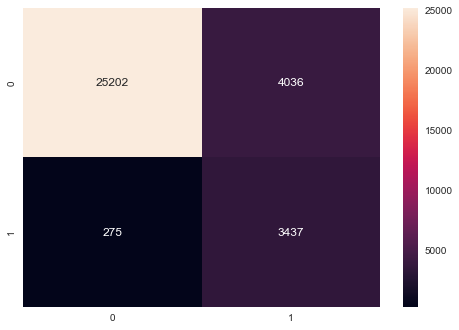

In [135]:
#Hacemos las predicciones:
predic_light = predict_model(lightgbm, data=df2.drop(['y'], axis=1))

y_test = df2['y'].values
y_pred = predic_light['Label']

#Creamos la matriz de confusión del modelo sin ajustar:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

<AxesSubplot:>

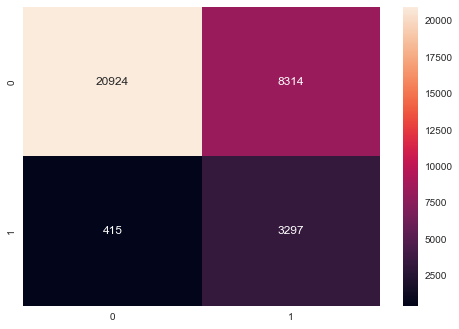

In [124]:
#Hacemos las predicciones:
predict_light_tuned = predict_model(tuned_light, data=df2.drop(['y'], axis=1))

y_test = df2['y'].values
y_pred = predict_light_tuned['Label']

#Creamos la matriz de confusión del modelo ajustado:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

Al hacer el entrenamiento y posterior afinacion de uno de los modelos observamos que las puntuaciones del modelo inicialmente planteado son ligeramente mejores que las puntuaciones de los modelos afinados. Buscando un poco de información descubrimos que esto podia pasar y que ajustando los parámetros de la funcion "tune_model()" podiamos intentar mejorar el proceso de afinado: seleccionando el puntaje de Recall como el que queremos optimizar (optimize="recall) y aumentando el número de iteraciones (n_iter=1000). El resultado obtenido es ligeramente mejor que el inicial con respecto a la puntuación de recall, pero a costa de una disminución pequeña del Accuracy. Al realizar el análisis de las matrices de confusión vemos que los resultados obtenidos con el primer modelo son mucho mejores. **Elegiremos el primer modelo para seguir con el análisis.**

Parámetros definidos: 

Los siguientes parámetros son definidos por defecto:

* Bagging_fraction: se toma un sample aleatorio de la base de datos, en nuestro caso, del 70%.
* Bagging_freq: indica luego de cuentas iteraciones se reemplaza el sample, en nuestro caso, despues de 1 iteración.
* max_depth: indica la profundidad máxima de el arbol. un valor de -1 indica que no tiene un límite definido.
* n_estimators: indica el número de árboles a ajustar. En nuestro caso, es de 230.
* num_leaves: maximo número de hojas (o nodos), en nuestro caso, 70.

Para hacer más completo este análisis vamos a probar otros modelos: usaremos aquellos provistos en la biblioteca sklearn: Decision Tree Classifier, Random Forest Classifier, K-Neighbors Classifier y Logistic Regression.

Para mejorar el resultado obtenido vamos a hacer validación cruzada de los datos, haciendo un total de 6 divisiones de los datos en conjuntos de testeo y entrenamiento.

In [137]:
X = df2.drop("y",axis=1).values
y = df2["y"].values
kf = KFold(n_splits=6, shuffle=True, random_state=42)
kf.get_n_splits(X)

6

**Decision Tree Classifier**: seleccionamos una profundidad máxima del arbol (max_depth) igual a 5 (se probaron valores de 4 a 10) y usamos el parámetro 'class_weight="balanced"', con el cual nos aseguramos que para cada subconjunto de entrenamiento cada clase tenga un peso inversamente proporcional a la cantidad de registros que tenemos: para la clase 1 (resultado positivo, el cliente creó un plazo fijo), como tenemos menor cantidad de registros le dara mayor peso a la hora de entrenar el modelo.


In [138]:
#Decision Tree Classifier:

recall_DT = {"train":[], "test":[]}
accuracy_DT = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] #Definimos los datasets a usar para validación cruzada.
  y_train, y_test = y[train_index], y[test_index]

  modelo = DecisionTreeClassifier(max_depth = 5, random_state=0, class_weight="balanced")
  modelo.fit(X_train, y_train)
  
  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)
  
  recall_DT["train"].append(recall_score(y_train, y_pred_train))
  recall_DT["test"].append(recall_score(y_test, y_pred_test))

  accuracy_DT["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_DT["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_DT["train"])
test_recall = np.mean(recall_DT["test"])

train_accuracy = np.mean(accuracy_DT["train"])
test_accuracy = np.mean(accuracy_DT["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')


Recall promedio del conjunto de entrenamiento: 0.8698446081518636
Recall promedio del conjunto de testeo: 0.8591973877732751
Accuracy promedio del conjunto de entrenamiento: 0.7833990025921774
Accuracy promedio del conjunto de testeo: 0.7800920862844314
Los parámetros en el modelo son: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


In [139]:
#Exportamos el modelo y hacemos las predicciones:
exp_dtc = pickle.dumps(modelo)
dtc = pickle.loads(exp_dtc)
pred = dtc.predict(df2.drop("y",axis=1))

<AxesSubplot:>

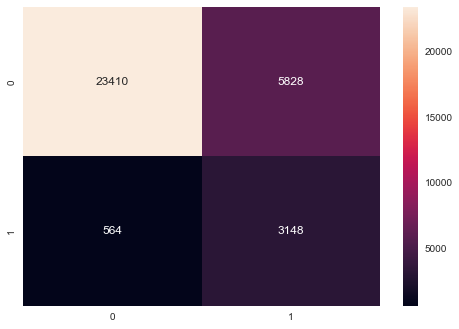

In [140]:
#Generamos la matriz de confusión:
conf_mat = confusion_matrix(df2['y'], pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

**Random Forest Classifier**: Seleccionamos una profundidad máxima de 6 (max_depth=6) luego de evaluar valores entre 5 y 10, y usamos el parámetro 'class_weight="balanced"' nuevamente. El n_estimators=100 nos indica el número de arboles que vamos a entrenar.

In [141]:
#Random Forest Classifier

recall_RF = {"train":[], "test":[]}
accuracy_RF = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index] #Definimos los datasets a usar para validación cruzada.

  modelo = RandomForestClassifier(max_depth = 6, class_weight="balanced")
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)
    
  recall_RF["train"].append(recall_score(y_train, y_pred_train))
  recall_RF["test"].append(recall_score(y_test, y_pred_test))

  accuracy_RF["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_RF["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_RF["train"])
test_recall = np.mean(recall_RF["test"])

train_accuracy = np.mean(accuracy_RF["train"])
test_accuracy = np.mean(accuracy_RF["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.8355427757475615
Recall promedio del conjunto de testeo: 0.8159168676115925
Accuracy promedio del conjunto de entrenamiento: 0.837019669042494
Accuracy promedio del conjunto de testeo: 0.8323223928325364
Los parámetros en el modelo son: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [142]:
#Exportamos el modelo y hacemos las predicciones:
exp_rfc = pickle.dumps(modelo)
rfc = pickle.loads(exp_rfc)
pred = rfc.predict(df2.drop("y",axis=1))

<AxesSubplot:>

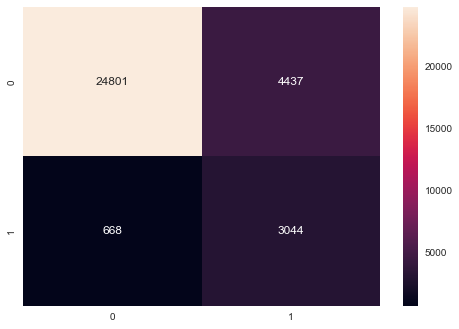

In [143]:
#Generamos la matriz de confusión:
conf_mat = confusion_matrix(df2['y'], pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

**Logistic Regresion**: Para este modelo seteamos el parámetro 'class_weight="balanced"' nuevamente.

In [144]:
# Logistic Regresion

recall_LR = {"train":[], "test":[]}
accuracy_LR = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index] #Definimos los datasets a usar para validación cruzada.

  modelo = LogisticRegression(class_weight="balanced")
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)
    
  recall_LR["train"].append(recall_score(y_train, y_pred_train))
  recall_LR["test"].append(recall_score(y_test, y_pred_test))

train_recall = np.mean(recall_LR["train"])
test_recall = np.mean(recall_LR["test"])

train_accuracy = np.mean(accuracy_LR["train"])
test_accuracy = np.mean(accuracy_LR["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.7527032891149941
Recall promedio del conjunto de testeo: 0.7545203370789012
Accuracy promedio del conjunto de entrenamiento: nan
Accuracy promedio del conjunto de testeo: nan
Los parámetros en el modelo son: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [145]:
#Exportamos el modelo y hacemos las predicciones:
exp_lr = pickle.dumps(modelo)
lr = pickle.loads(exp_lr)
pred = lr.predict(df2.drop("y",axis=1))

<AxesSubplot:>

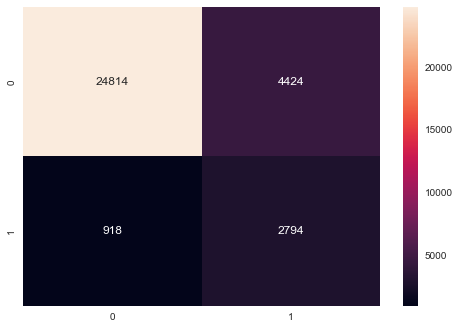

In [146]:
#Generamos la matriz de confusión:
conf_mat = confusion_matrix(df2['y'], pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

**K-Neighbors Classifier**: 

Agregando el parámetro 'weights' en la linea correspondiente la modelo se puede cambiar de 'uniform', que es por defecto (descripcion: All points in each neighborhood are weighted equally.) por 'distance' (descripcion: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.) y termina siendo el acuracy y el recall del conjunto de entrenamiento igual a 1, por lo que nos parecio que no sería la mnejor elección.

In [147]:
#K-Neighbours Classifier:

scalar = StandardScaler()
lab_enc = LabelEncoder()
df_scaled = pd.DataFrame(scalar.fit_transform(df2),columns = df2.columns)
df_encoded = pd.DataFrame()

for column in df_scaled:
    temp = pd.Series(lab_enc.fit_transform(df_scaled[column]))
    df_encoded[column] = temp

X_scaled = df_encoded.drop("y",axis=1).values
y_scaled = df_encoded['y'].values
kf_scaled = KFold(n_splits=6, shuffle=True, random_state=42)
kf_scaled.get_n_splits(X_scaled)

recall_KNN = {"train":[], "test":[]}
accuracy_KNN = {"train":[], "test":[]}

for train_index, test_index in kf_scaled.split(X_scaled):
  X_train, X_test = X[train_index], X[test_index] #Definimos los datasets a usar para validación cruzada.
  y_train, y_test = y[train_index], y[test_index]

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(X_train, y_train)
  
  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)
  
  recall_KNN["train"].append(recall_score(y_train, y_pred_train))
  recall_KNN["test"].append(recall_score(y_test, y_pred_test))

  accuracy_KNN["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_KNN["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_KNN["train"])
test_recall = np.mean(recall_KNN["test"])

train_accuracy = np.mean(accuracy_KNN["train"])
test_accuracy = np.mean(accuracy_KNN["test"])


print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.4764692793993525
Recall promedio del conjunto de testeo: 0.3804709213956146
Accuracy promedio del conjunto de entrenamiento: 0.9206919567511647
Accuracy promedio del conjunto de testeo: 0.8989680812085229
Los parámetros en el modelo son: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [148]:
#Exportamos el modelo y hacemos las predicciones:
exp_knn = pickle.dumps(modelo)
knn = pickle.loads(exp_knn)
pred = knn.predict(df2.drop("y",axis=1))

<AxesSubplot:>

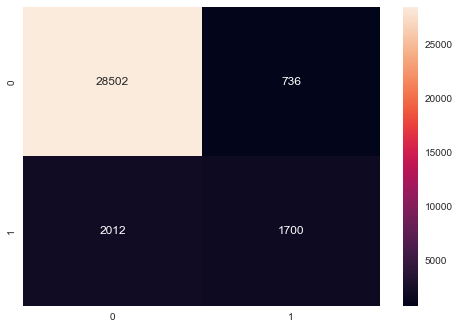

In [149]:
#Generamos la matriz de confusión:
conf_mat = confusion_matrix(df2['y'], pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

Por los resultados obtenidos vamos a elegir el modelo de "K-Neighbours Classifier".

Podemos mostrar algunos gráficos de interes que nos muestran la performance del modelo:

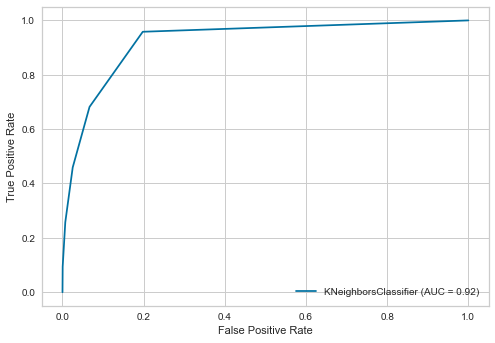

In [62]:
plot_roc_curve(knn, X=df2.drop("y",axis=1), y=df2['y'])

### Mejoramiento del modelo

#### Ajuste de Hiperparámetros:

**RandomizedSearchCV:**

In [193]:
#Calculamos los mejores valores para los parámetros definidos y hacemos las predicciones:

hyperp = dict(leaf_size = list(range(1,50)), n_neighbors = list(range(1,30)))
rand_knn = RandomizedSearchCV(estimator=knn, param_distributions=hyperp, n_iter=10)

rand_knn.fit(X=df2.drop('y', axis=1), y=df2['y'])

pred_rand_knn = rand_knn.predict(df2.drop("y",axis=1))

In [194]:
#Mejores valores obtenidos:

rand_knn.best_params_

{'n_neighbors': 28, 'leaf_size': 24}

<AxesSubplot:>

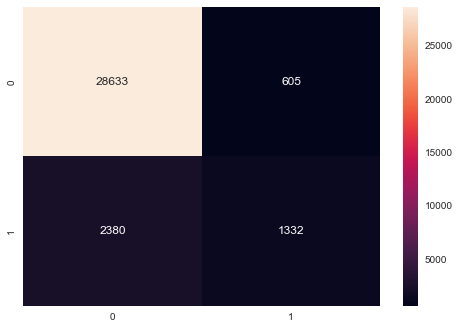

In [195]:
#Generamos la matriz de confusión:

conf_mat = confusion_matrix(df2['y'], pred_rand_knn)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

**GridSearchCV:**

In [199]:
#Calculamos los mejores valores para los parámetros definidos y hacemos las predicciones:

hyperp = dict(leaf_size = list(range(1,10)), n_neighbors = list(range(1,10)))
grid_knn = GridSearchCV(estimator=knn, param_grid=hyperp)

grid_knn.fit(X=df2.drop('y', axis=1), y=df2['y'])

pred_grid_knn = grid_knn.predict(df2.drop("y",axis=1))

In [200]:
#Mejores valores obtenidos:

grid_knn.best_params_

{'leaf_size': 2, 'n_neighbors': 9}

<AxesSubplot:>

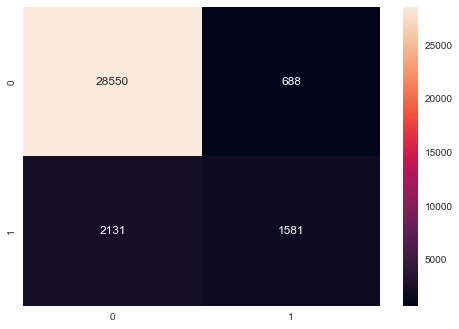

In [201]:
#Generamos la matriz de confusión:

conf_mat = confusion_matrix(df2['y'], pred_grid_knn)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

#### Seleccion de features:

Desgraciadamente no pudimos realizar el análisis para el modelo de K-neighbors Classifier ni Logistic Regression por limitaciones tanto de la biblioteca BorutaShap, pero lo haremos para el resto de los modelos: nuestro objetivo es no obviar algun modelo que pueda presentarse como peor antes de realizar la optimización pero que pudiera obtener mejores resultados más adelante.

**Light Gradient Boosting Classifier:**

In [160]:
Feature_Selector = BorutaShap(model=lightgbm, importance_measure='shap', classification=True)

Feature_Selector.fit(X=df2.drop(['y'], axis=1), y=df2['y'], n_trials=20, sample=False, train_or_test = 'test', normalize=True, verbose=False)

  0%|          | 0/20 [00:00<?, ?it/s]

['campaign', 'education', 'month', 'duration', 'age', 'pdays', 'contact', 'default']
['job']


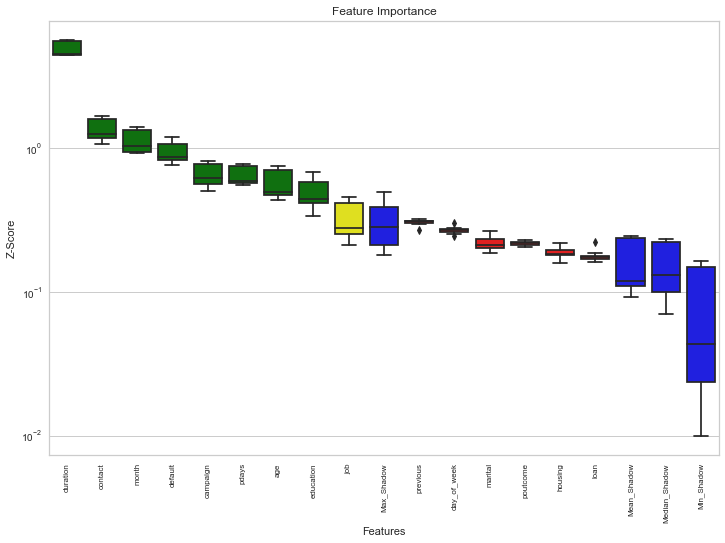

In [161]:
print (Feature_Selector.accepted)
print (Feature_Selector.tentative)

Feature_Selector.plot(which_features='all')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8487,0.9220,0.8533,0.4154,0.5588,0.4803,0.5257
1,0.8604,0.9272,0.8533,0.4376,0.5785,0.5051,0.5456
2,0.8630,0.9283,0.8533,0.4429,0.5831,0.5108,0.5502
3,0.8440,0.9200,0.8533,0.4070,0.5511,0.4706,0.5180
4,0.8487,0.9301,0.8876,0.4171,0.5675,0.4899,0.5413
5,0.8430,0.9270,0.8760,0.4065,0.5553,0.4750,0.5268
6,0.8456,0.9193,0.8333,0.4072,0.5471,0.4669,0.5105
7,0.8521,0.9266,0.8721,0.4221,0.5689,0.4924,0.5397
8,0.8608,0.9295,0.8687,0.4395,0.5837,0.5107,0.5535


<AxesSubplot:>

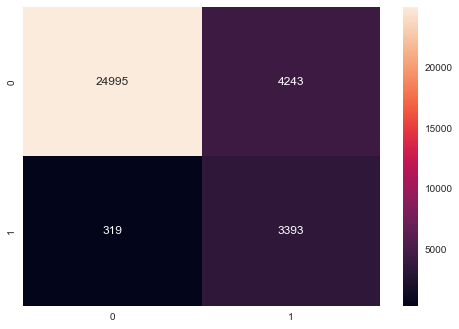

In [162]:
df_boruta = df2[['campaign', 'education', 'month', 'duration', 'age', 'pdays', 'contact', 'default', 'y']]

modelos_clasif = setup(data = df_boruta, target = "y", normalize=True)

light_boruta = create_model("lightgbm", class_weight='balanced')

predic_light = predict_model(light_boruta, data=df_boruta.drop(['y'], axis=1))

y_test = df_boruta['y'].values
y_pred = predic_light['Label']

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)


**Decision Tree Classifier:**

In [163]:
Feature_Selector = BorutaShap(model=dtc, importance_measure='shap', classification=True)

Feature_Selector.fit(X=df2.drop(['y'], axis=1), y=df2['y'], n_trials=20, sample=False, train_or_test = 'test', normalize=True, verbose=False)

  0%|          | 0/20 [00:00<?, ?it/s]

['campaign', 'month', 'duration', 'age', 'pdays', 'contact', 'default']
['poutcome']


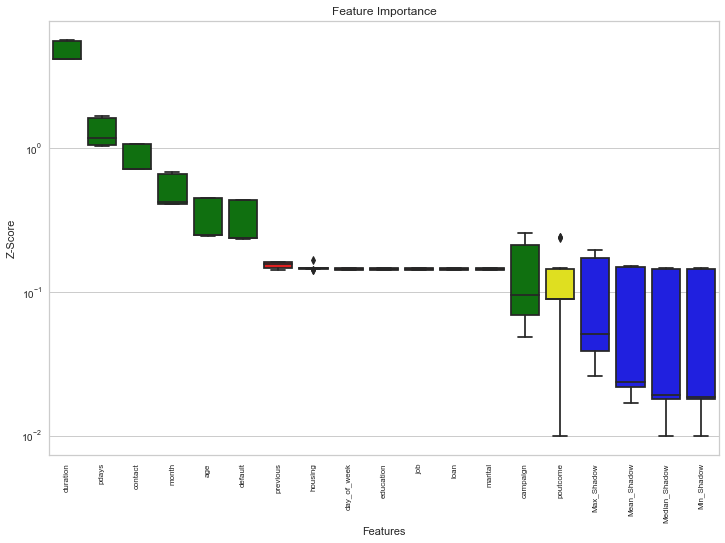

In [164]:
print (Feature_Selector.accepted)
print (Feature_Selector.tentative)

Feature_Selector.plot(which_features='all')


Recall promedio del conjunto de entrenamiento: 0.8698984063012073
Recall promedio del conjunto de testeo: 0.8597422393778328
Accuracy promedio del conjunto de entrenamiento: 0.7832897450377181
Accuracy promedio del conjunto de testeo: 0.7800313974678553
Los parámetros en el modelo son: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


<AxesSubplot:>

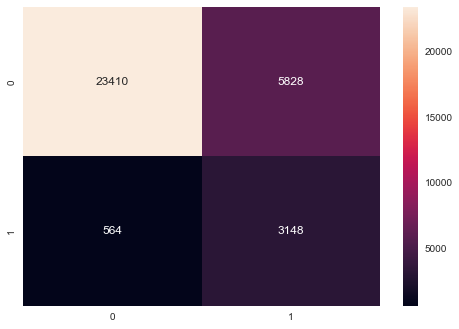

In [171]:
df_boruta_dtc = df2[['campaign', 'month', 'duration', 'age', 'pdays', 'contact', 'default', 'y']]

X = df_boruta_dtc.drop("y",axis=1).values
y = df_boruta_dtc["y"].values
kf = KFold(n_splits=6, shuffle=True, random_state=42)
kf.get_n_splits(X)

recall_DT = {"train":[], "test":[]}
accuracy_DT = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] #Definimos los datasets a usar para validación cruzada.
  y_train, y_test = y[train_index], y[test_index]

  modelo = DecisionTreeClassifier(max_depth = 5, random_state=0, class_weight="balanced")
  modelo.fit(X_train, y_train)
  
  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)
  
  recall_DT["train"].append(recall_score(y_train, y_pred_train))
  recall_DT["test"].append(recall_score(y_test, y_pred_test))

  accuracy_DT["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_DT["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_DT["train"])
test_recall = np.mean(recall_DT["test"])

train_accuracy = np.mean(accuracy_DT["train"])
test_accuracy = np.mean(accuracy_DT["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

#Exportamos el modelo y hacemos las predicciones:
exp_dtc_boruta = pickle.dumps(modelo)
dtc_boruta = pickle.loads(exp_dtc_boruta)
pred_dtc_boruta = dtc_boruta.predict(df_boruta_dtc.drop("y",axis=1))

y_test = df_boruta_dtc['y'].values
y_pred = pred_dtc_boruta

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=True)

**Random Forest Classifier:**

  0%|          | 0/10 [00:00<?, ?it/s]

['campaign', 'marital', 'previous', 'education', 'month', 'duration', 'age', 'job', 'pdays', 'contact', 'poutcome', 'default']
['day_of_week']


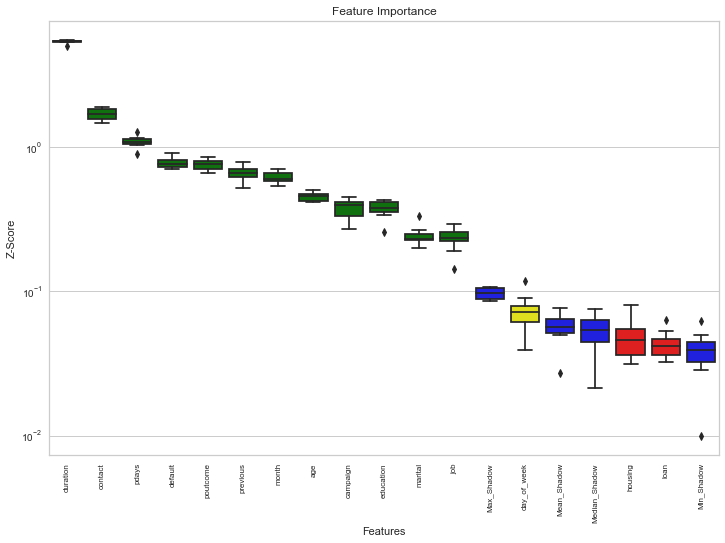

In [202]:
#Se redujo el numero de intentos a 5 por limitaciones de hardware.

Feature_Selector = BorutaShap(model=rfc, importance_measure='shap', classification=True)

Feature_Selector.fit(X=df2.drop(['y'], axis=1), y=df2['y'], n_trials=10, sample=False, train_or_test = 'test', normalize=True, verbose=False)

print (Feature_Selector.accepted)
print (Feature_Selector.tentative)

Feature_Selector.plot(which_features='all')


En este caso, como podemos ver, la gran mayoria de las variables se presentan como 'importantes'. Debido a esto no podemos confiar en el resultado obtenido por el proceso de análisis y nos quedaremos con los valores obtenidos por el primer modelo entrenado.

### Resultado Final:

Para mejorar nuestro modelo podriamos tratar de obtener una mayor cantidad de registros o tratar de obtener una mayor capacidad de computo que nos permita revisar en mayor profundidad los datos de que disponemos, dado que uno de nuestros mayores limitantes es el hardware de que disponemos.
Considerando los resultados obtenidos luego del trabajo de mejoramiento realizado decidimos mantener el modelo ‘K-Neighbors Classifier’. A pesar de que tenemos una menor proporción de verdaderos positivos con respecto a los otros modelos, la cantidad de falsos positivos es la menor entre todos los grupos. La elección se tomó luego de sopesar los resultados obtenidos: aunque no obtengamos la mayor cantidad de clientes posible que acepten definir un plazo fijo (tiene la menor proporción de verdaderos positivos de todo el grupo) no vamos a tener una pérdida de recursos tan grande como con el resto de los modelos al enfocarnos en los clientes equivocados (tiene la menor cantidad de falsos positivos). Sin embargo, se deberá tratar de mejorar el modelo para disminuir el número de falsos negativos. 

Si se sigue manteniendo el comportamiento observado en la subpoblación correspondiente a mayores de 60 años (constitución de plazos fijos con duración de llamadas más cortas, en especial en los meses de marzo, septiembre, octubre y diciembre) también podríamos ofrecer promociones especiales que logren que más gente decida constituir plazos fijos.

Para mejorar nuestro modelo podríamos intentar los siguientes pasos:

*	tratar de obtener una mayor cantidad de registros o tratar de obtener una mejor capacidad de cómputo que nos permita revisar en mayor profundidad los datos de que disponemos, dado que una de nuestras mayores limitantes es el hardware.  
*	La codificación de las variables categóricas no es la óptima, dado que se usaron números consecutivos (proceso de codificación autimática).  

Nuevamente mostraremos los resultados obtenidos para el modelo seleccionado:


Nuevamente mostraremos los resultados obtenidos para el modelo seleccionado:
* Modelo: K-Neighbors Classifier.
* Parámetros: 
  * 'leaf_size': 30, 
  * 'n_neighbors': 5, 
  * 'p': 2,
  * datos normalizados.
* Puntajes: 
  * Recall (entrenamiento): 0.48,
  * Recall (testeo): 0.38,
  * Accuracy (entrenamiento): 0.92,
  * Accuracy (testeo): 0.90

<center>
<table border=0>
 <tr>
    <td><center>Matriz de Confusión</center></td>
    <td><center>Curva ROC</center></td>
 </tr>
 <tr>
    <td><center><img src="img/conf_matrix_knn.png" width="500"/></center></td>
    <td><center><img src="img/roc_curve_knn.png" width="500"/></center></td>
 </tr>
</table>
</center>